<a href="https://colab.research.google.com/github/gargarchit/Camera_Calibration/blob/master/Camera_Calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Camera Calibration

After the production of the camera, it has some distortion due to lense is not aligned perfectly parallel to the imaging plane. Hence to remove this distortion we need to do Camera Calibration as follows:
<br>
<br>
*Please add input images at the same directory this file is present*

In [0]:
# Importing Dependencies
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

# Termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [0]:
def get_points():
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(7,6,0)
    objp = np.zeros((6*7,3), np.float32)
    objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

    objpoints = [] # Array to store 3d point in real world space
    imgpoints = [] # Array to store 2d points in image plane.

    images = glob.glob('*.jpg') #Collecting Images from colab file storage
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Converting BGR Image to GRAY scale

        # To check the chess board corners
        ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

        # If found, we have to add object points, image points (after refining them)
        if ret == True:
            objpoints.append(objp)

            corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
            imgpoints.append(corners2)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
            plt.imshow(img)  #Plotting Image after adding Corners
            cv2.waitKey(500)
    cv2.destroyAllWindows() 
    return objpoints, imgpoints

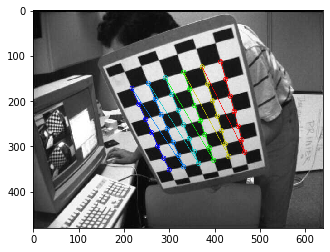

In [104]:
objpoints, imgpoints = get_points()

##Calibration for getting camera matrix

On taking object points and image points from get_points()<br>
we can do calibration which will return camera matrix 


In [0]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [106]:
print("Camera Calibration Matrix: ")
print("")
print(mtx)

Camera Calibration Matrix: 

[[534.07088623   0.         341.53407107]
 [  0.         534.11914798 232.94565221]
 [  0.           0.           1.        ]]


##Undistortion
After getting the mtx i.e camera matrix we need to undistort the image

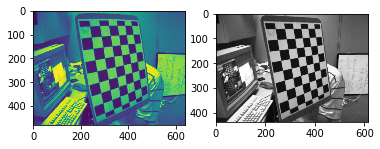

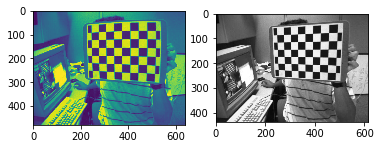

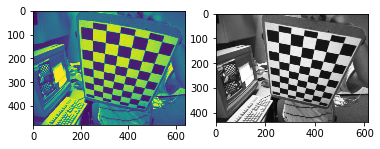

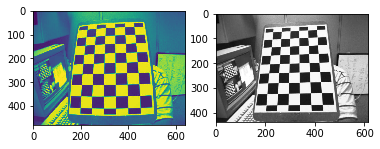

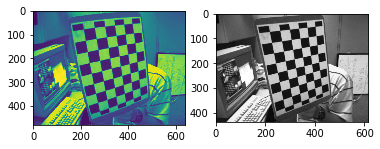

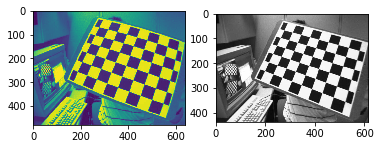

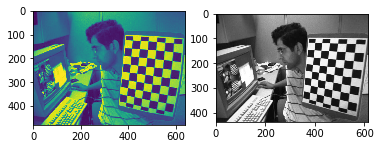

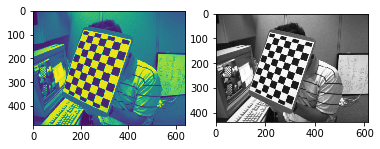

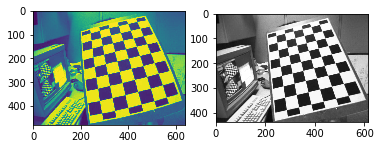

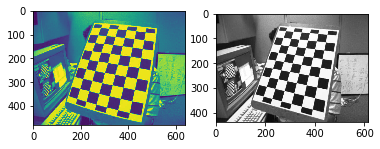

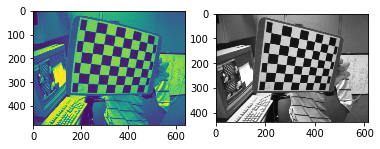

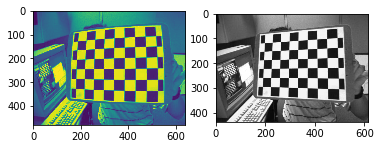

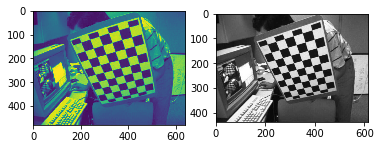

In [107]:
images = glob.glob('*.jpg') # Undistorting all the images taken as input

for fname in images:
    img = cv2.imread(fname)
    h,  w = img.shape[:2]
    newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    
    # Here, I am finding a mapping function from distorted image to undistorted image. Then use the remap function.
    mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
    dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

    x,y,w,h = roi #crop the image for region of interest
    dst = dst[y:y+h, x:x+w]
    cv2.imwrite('result.png',dst)
    img1=mpimg.imread(fname)
    img=mpimg.imread('result.png')
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img1)
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(img)
    plt.show()

##Re-projection Error
It signifies how accurate is the found parameters

In [108]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2) #Absolute norm with transformation and corner finding Algorithm
    mean_error += error #for all calibration image

print("total error: ", mean_error/len(objpoints)) 

total error:  0.02368600473439133
